In [2]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


In [46]:
MainStreet = pd.read_csv("MainStreets_Business_List.CSV")
MainStreet.head()


,Unnamed: 0,latitude,longitude,business_name,street_address,ZIP_code,NAICS_2017_6digit_code,NAICS_2017_6digit_desc,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet
0,1,42.349398,-71.154065,zisis convenience store,375 Washington St,2135,452319,All Other General Merchandise Stores,45,Retail Trade,1,1 to 9,Brighton
1,2,42.350387,-71.165135,ziggy's,583 Washington St,2135,0,,99,Undefined,0,Not Available,Brighton
2,3,42.349219,-71.151769,zen zone acupuncture & spa,319 Washington St,2135,621399,Offices of All Other Miscellaneous Health Prac...,62,Healthcare and Social Assistance,2,1 to 9,Brighton
3,4,42.349465,-71.153117,yes nails & spa inc,416 Market St,2135,812113,Nail Salons,81,Other Services,3,1 to 9,Brighton
4,5,42.349453,-71.151543,xfinity,12 Wirt St,2135,515210,Cable and Other Subscription Programming,51,Information,13,10 to 24,Brighton


In [65]:
Useful_data = pd.DataFrame(MainStreet, columns = ['latitude', 'longitude', 'NAICS_2017_2digit_desc', 'estimated_employment', 'mainstreet'])
Useful_data

,latitude,longitude,NAICS_2017_2digit_desc,estimated_employment,mainstreet
0,42.349398,-71.154065,Retail Trade,1,Brighton
1,42.350387,-71.165135,Undefined,0,Brighton
2,42.349219,-71.151769,Healthcare and Social Assistance,2,Brighton
3,42.349465,-71.153117,Other Services,3,Brighton
4,42.349453,-71.151543,Information,13,Brighton
...,...,...,...,...,...
4931,42.334142,-71.104168,Retail Trade,9,Mission Hill
4932,42.332113,-71.099582,Undefined,0,Mission Hill
4933,42.331603,-71.112383,Undefined,0,Mission Hill
4934,42.333447,-71.105691,Retail Trade,0,Mission Hill


## Estimated Mean Employment Per MainStreet

20
['Allston Village', 'Bowdoin/Geneva', 'Brighton', 'Chinatown', 'East Boston', 'Egleston Square', 'Fields Corner', 'Four Corners', 'Greater Ashmont', 'Greater Grove Hall', 'Hyde Park', 'JP Centre/South', 'Mattapan Square', 'Mission Hill', 'Roslindale Village', 'Roxbury', 'Three Squares', 'Uphams Corner', 'Washington St Gateway', 'West Roxbury']


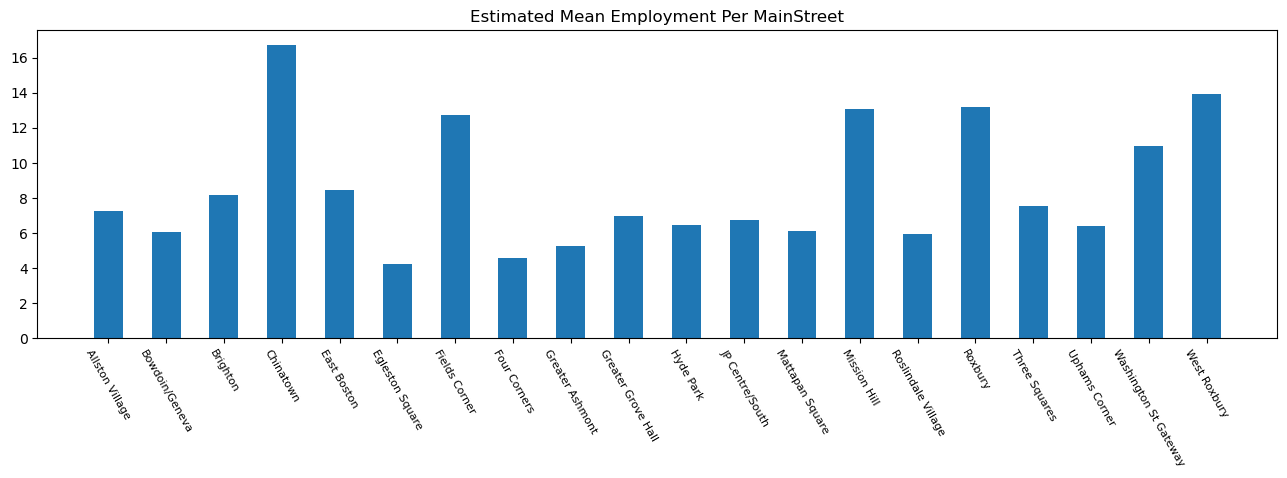

In [135]:
employment = pd.DataFrame(Useful_data, columns = ['estimated_employment', 'mainstreet'])
# list(employment.groupby(['mainstreet']))
mean_employment = employment.groupby(['mainstreet'])['estimated_employment'].mean()
mean_employment = mean_employment.to_frame().reset_index() 

data = mean_employment['estimated_employment'].values.tolist()
labels = mean_employment['mainstreet'].values.tolist()
print(len(mean_employment))
print(labels)

fig = plt.figure(figsize=(16,4))    # 设置画布大小
plt.bar(range(len(mean_employment)), data, width = 0.5, tick_label = labels)
plt.tick_params(axis='x', labelsize=8)    # 设置x轴标签大小
plt.xticks(rotation=-60) # 旋转标签
plt.title("Estimated Mean Employment Per MainStreet")
plt.show()
# mean_employment

In [67]:
top10_street = pd.DataFrame(mean_employment.sort_values(['estimated_employment'], ascending = False))
top10_street

,mainstreet,estimated_employment
3,Chinatown,16.733467
19,West Roxbury,13.934211
15,Roxbury,13.184397
13,Mission Hill,13.047945
6,Fields Corner,12.713768
18,Washington St Gateway,10.938338
4,East Boston,8.443366
2,Brighton,8.169611
16,Three Squares,7.509554
0,Allston Village,7.235437


In [132]:
service_type = Useful_data.groupby(['mainstreet'])['NAICS_2017_2digit_desc']
# list(service_type)
service_type = list(service_type)
service_type

[('Allston Village',
  283    Healthcare and Social Assistance
  284     Accommodation and Food Services
  285                           Undefined
  286                     Wholesale Trade
  287                       Manufacturing
                       ...               
  690     Accommodation and Food Services
  691                        Retail Trade
  692     Accommodation and Food Services
  693                        Retail Trade
  694     Accommodation and Food Services
  Name: NAICS_2017_2digit_desc, Length: 412, dtype: object),
 ('Bowdoin/Geneva',
  2969                                         Retail Trade
  2970                      Accommodation and Food Services
  2971                                         Retail Trade
  2972                                Finance and Insurance
  2973                                         Retail Trade
                                ...                        
  3079                                       Other Services
  3080          

## Number of Business Services Per MainStreet

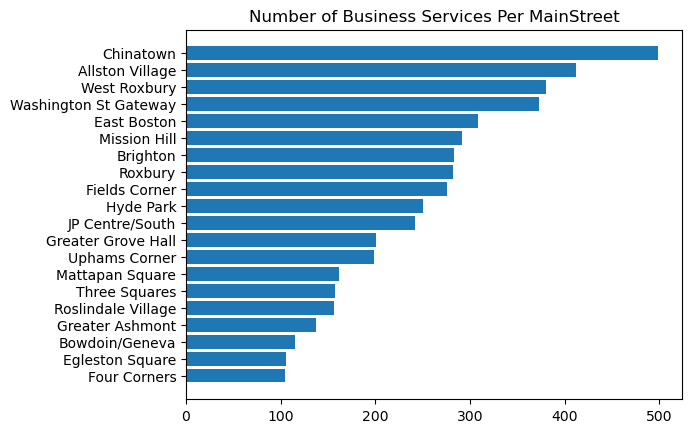

In [133]:
service_count = Useful_data['NAICS_2017_2digit_desc'].groupby(Useful_data['mainstreet'])
service_count = service_count.count()

service_count = service_count.sort_values(ascending = True)
data = service_count.values
labels = service_count.index
# print(len(data))
# print(labels)

plt.barh(labels, data)
plt.title("Number of Business Services Per MainStreet")
plt.show()

## Estimated Total Employment Per Service

20
['Agriculture, Forestry, Fishing and Hunting', 'Mining', 'Management of Companies and Enterprises', 'Arts, Entertainment, and Recreation', 'Undefined', 'Wholesale Trade', 'Adminstrative, Support, Waste Management, and Remediation Services', 'Manufacturing', 'Construction', 'Information', 'Transportation and Warehosuing', 'Real Estate Rental and Leasing', 'Finance and Insurance', 'Educational Services', 'Professional, Scientific, and Technical Services', 'Public Administration', 'Other Services', 'Retail Trade', 'Accommodation and Food Services', 'Healthcare and Social Assistance']


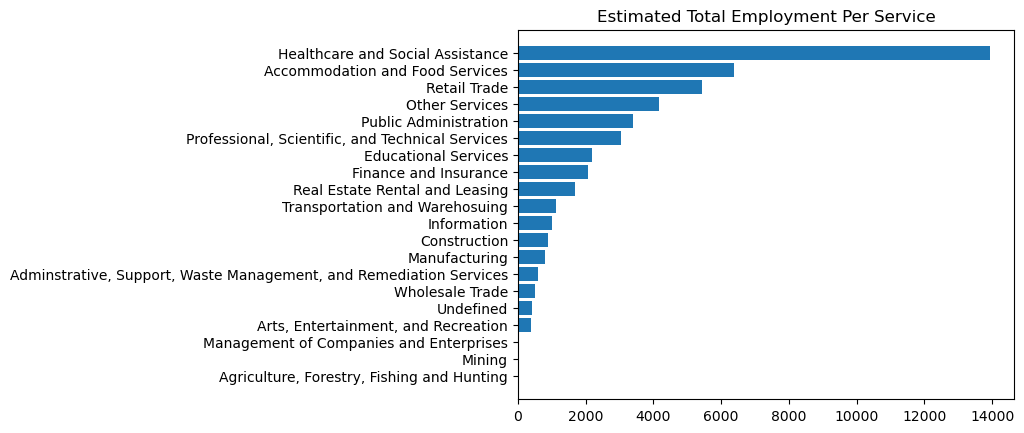

In [134]:
service_type = Useful_data.groupby(['NAICS_2017_2digit_desc'])['estimated_employment'].sum()
# list(service_type)
# service_type = list(service_type)
# service_type
service_type = service_type.to_frame().reset_index() 
# service_type


top10_service = pd.DataFrame(service_type.sort_values(['estimated_employment'], ascending = True))
data = top10_service['estimated_employment'].values.tolist()
labels = top10_service['NAICS_2017_2digit_desc'].values.tolist()
print(len(data))
print(labels)

# plt.bar(range(len(data)), data,width = 0.5, tick_label = labels)
plt.barh(labels, data)    # 绘制横向柱状图
plt.title("Estimated Total Employment Per Service")
plt.show()

In [83]:
top10_service = pd.DataFrame(service_type.sort_values(['estimated_employment'], ascending = False))
top10_service

,NAICS_2017_2digit_desc,estimated_employment
7,Healthcare and Social Assistance,13945
0,Accommodation and Food Services,6367
16,Retail Trade,5437
12,Other Services,4172
14,Public Administration,3395
13,"Professional, Scientific, and Technical Services",3040
5,Educational Services,2196
6,Finance and Insurance,2073
15,Real Estate Rental and Leasing,1674
17,Transportation and Warehosuing,1131
